In [1]:
from denn.utils import Discriminator, Generator
from denn.sho.gan_sho import train_GAN_SHO_unsupervised
import torch.nn as nn

# Unsupervised GAN

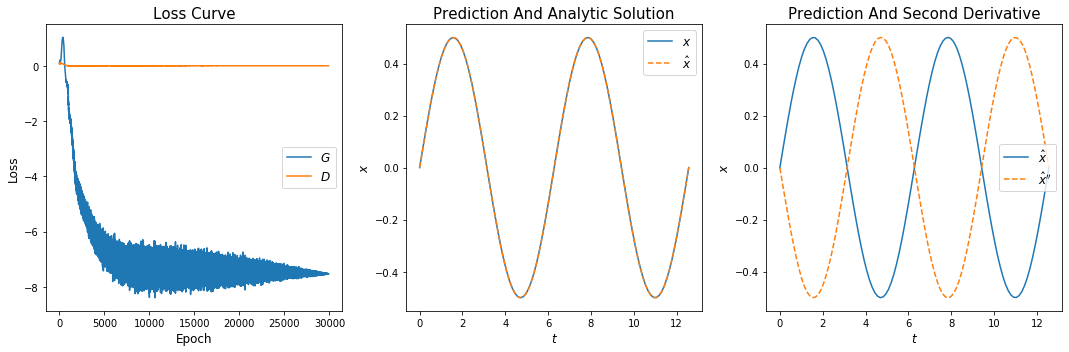

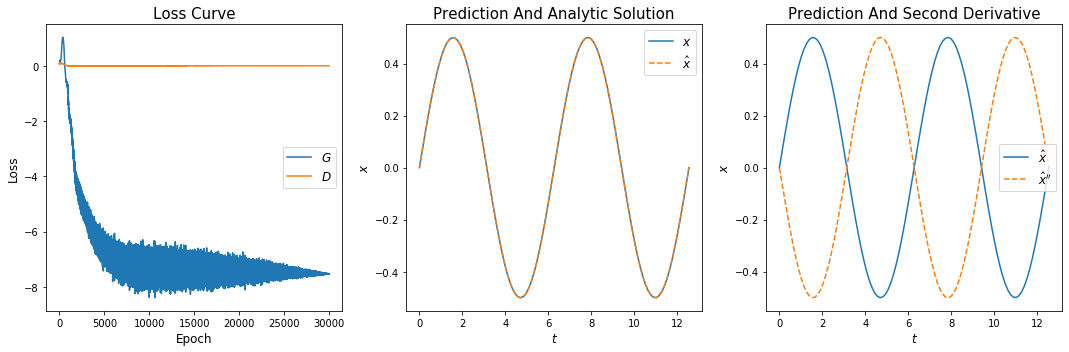

Final MSE: 1.7926375051047216e-07


In [9]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=32,
              n_hidden_layers=3,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=False)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=32,
                  n_hidden_layers=3,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=False)

res = train_GAN_SHO_unsupervised(G, D, d_lr=2e-4, final_plot=True, num_epochs=30000, realtime_plot=True, check_every=100, system_of_ODE=False)

# Unsupervised MSE

In [2]:
from denn.utils import Discriminator, Generator
from denn.sho.mse_sho import train_MSE
import torch.nn as nn

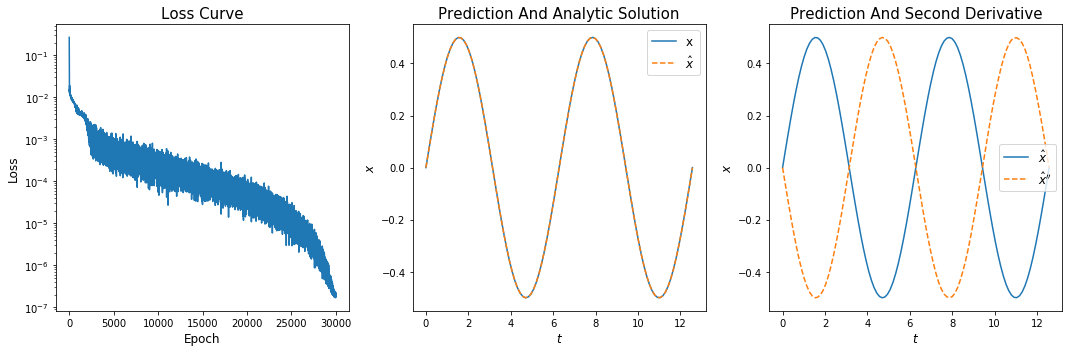

Final MSE 1.4100310918863102e-09


In [3]:
msenet = Generator(in_dim=1, out_dim=1,
    n_hidden_units=32,
    n_hidden_layers=3,
    activation=nn.Tanh(), 
    output_tan=False,
    residual=False)
res = train_MSE(msenet, method='unsupervised', niters=30000, make_plot=True, perturb=True)

# Hyper Job (Dec. 1, 2020)

In [1]:
import pandas as pd
hp = pd.read_csv('/Users/dylanrandle/Downloads/GAN_hyper_results.csv', index_col=0)

In [2]:
hp.head()

,kwargs,mean_mse,std_mse
0,"{'num_epochs': 10000, 'd_lr': 0.0002, 'g_lr': ...",0.000006,5.188484e-06
1,"{'num_epochs': 10000, 'd_lr': 0.0002, 'g_lr': ...",0.000002,2.141016e-06
2,"{'num_epochs': 10000, 'd_lr': 0.0002, 'g_lr': ...",0.000005,7.303571e-07
3,"{'num_epochs': 10000, 'd_lr': 0.0002, 'g_lr': ...",0.000018,1.349257e-05
4,"{'num_epochs': 10000, 'd_lr': 0.0002, 'g_lr': ...",0.000007,4.424866e-06


In [5]:
hp.sort_values(by='mean_mse', ascending=True, inplace=True)

In [11]:
hp.head(10)

,kwargs,mean_mse,std_mse
67,"{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0...",7.389120e-09,6.655359e-09
69,"{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0...",7.682117e-09,5.345115e-09
65,"{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0...",8.298973e-09,5.959358e-09
121,"{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0...",9.462096e-09,5.568830e-09
105,"{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0...",1.020571e-08,6.202665e-09
77,"{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0...",2.237043e-08,1.327684e-08
75,"{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0...",2.670833e-08,1.926830e-08
107,"{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0...",3.055784e-08,3.483837e-08
123,"{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0...",3.412355e-08,3.661433e-08
73,"{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0...",5.854643e-08,4.876299e-08


In [10]:
for i, (idx, row) in enumerate(hp.iterrows()):
    if i > 10: 
        break
    print(row['kwargs'])
        

{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0.0002, 'g_units': 64, 'g_layers': 6, 'd_units': 64, 'd_layers': 4, 'gp': 0.1, 'g_iters': 1, 'd_iters': 1}
{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0.0002, 'g_units': 64, 'g_layers': 6, 'd_units': 32, 'd_layers': 6, 'gp': 0.1, 'g_iters': 1, 'd_iters': 1}
{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0.0002, 'g_units': 64, 'g_layers': 6, 'd_units': 64, 'd_layers': 6, 'gp': 0.1, 'g_iters': 1, 'd_iters': 1}
{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0.001, 'g_units': 32, 'g_layers': 4, 'd_units': 64, 'd_layers': 6, 'gp': 0.1, 'g_iters': 1, 'd_iters': 1}
{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0.001, 'g_units': 64, 'g_layers': 4, 'd_units': 64, 'd_layers': 6, 'gp': 0.1, 'g_iters': 1, 'd_iters': 1}
{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0.0002, 'g_units': 64, 'g_layers': 4, 'd_units': 32, 'd_layers': 6, 'gp': 0.1, 'g_iters': 1, 'd_iters': 1}
{'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0.0002, 'g_units': 64, 'g_layers': 4, 'd_unit

In [17]:
import matplotlib.pyplot as plt
import numpy as np

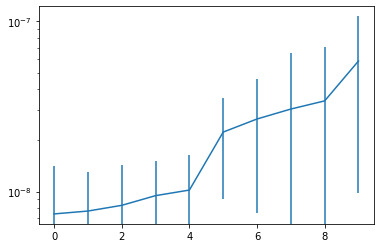

In [20]:
plt.errorbar(np.arange(10), hp.iloc[0:10].mean_mse, yerr=hp.iloc[0:10].std_mse)
plt.yscale('log')

### Running best result

In [22]:
best_args = {'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0.0002, 'g_units': 64, 'g_layers': 6, 
 'd_units': 64, 'd_layers': 4, 'gp': 0.1, 'g_iters': 1, 'd_iters': 1}

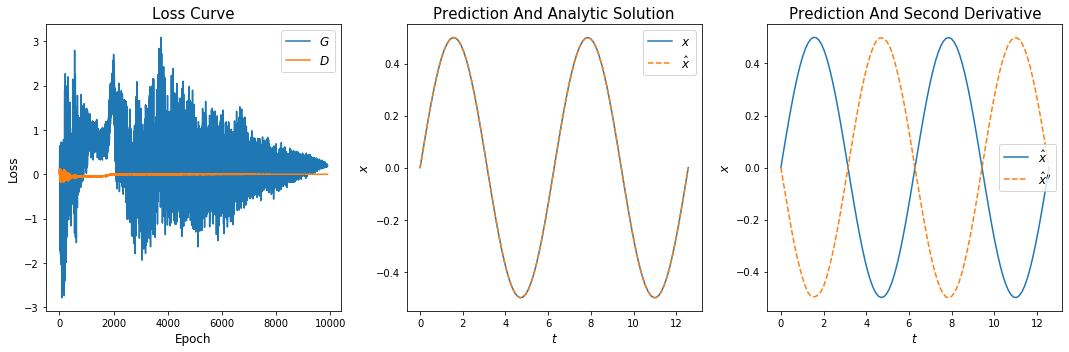

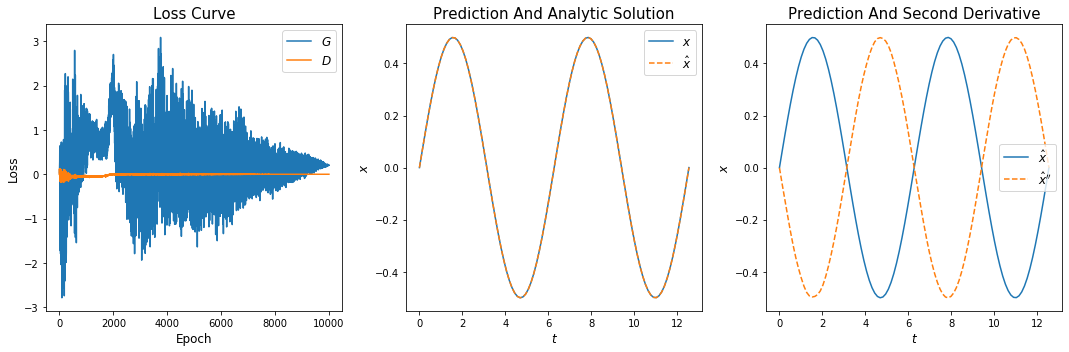

Final MSE: 1.0015279272579392e-08


In [23]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=6,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=True)

res = train_GAN_SHO_unsupervised(G, D, d_lr=1e-3, g_lr=2e-4, final_plot=True, num_epochs=10000, 
                                 realtime_plot=True, G_iters=1, D_iters=1, gp=0.1, check_every=100, system_of_ODE=False)

### Comparing to equivalent MSE

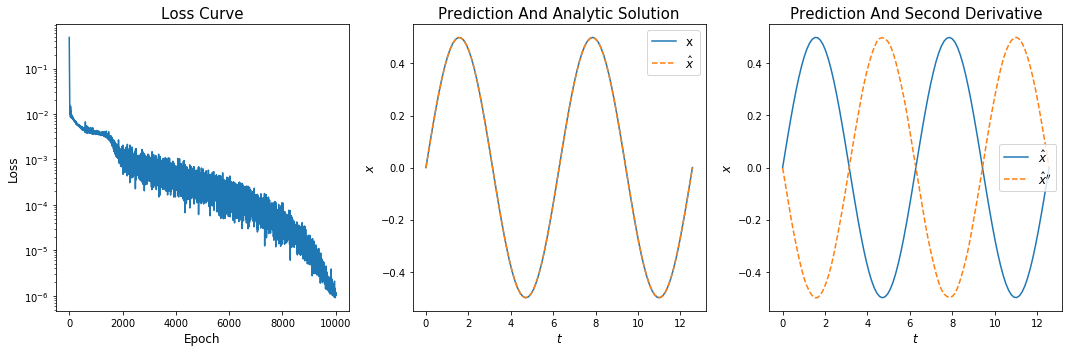

Final MSE 9.100844522436091e-08


In [25]:
msenet = Generator(in_dim=1, out_dim=1,
    n_hidden_units=64,
    n_hidden_layers=6,
    activation=nn.Tanh(),
    output_tan=False,
    residual=True)
res = train_MSE(msenet, method='unsupervised', niters=10000, make_plot=True, perturb=True, lr=2e-4)

## Experimenting with G/D iters

### G:D = 1:4

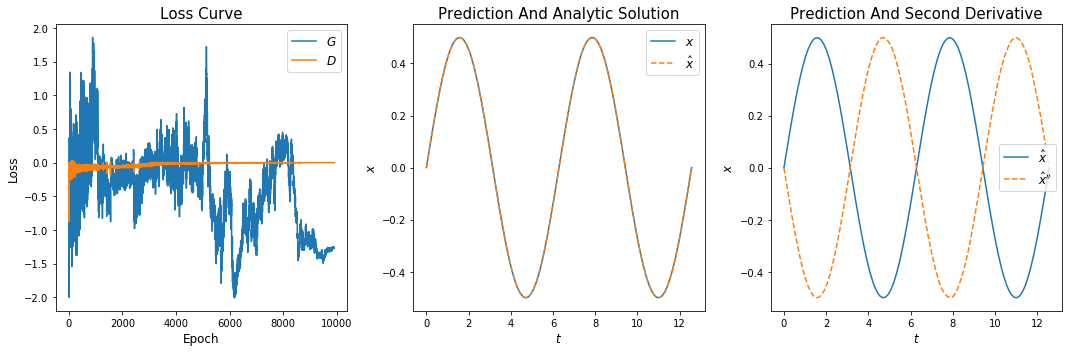

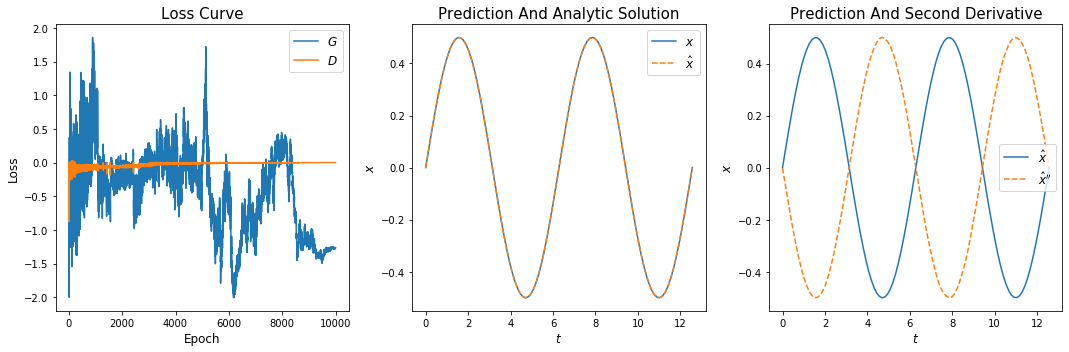

Final MSE: 9.514494081486191e-09


In [2]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=6,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=True)

res = train_GAN_SHO_unsupervised(G, D, d_lr=1e-3, g_lr=2e-4, final_plot=True, num_epochs=10000, 
                                 realtime_plot=True, G_iters=1, D_iters=4, gp=0.1, check_every=100, system_of_ODE=False)

### G:D = 4:1

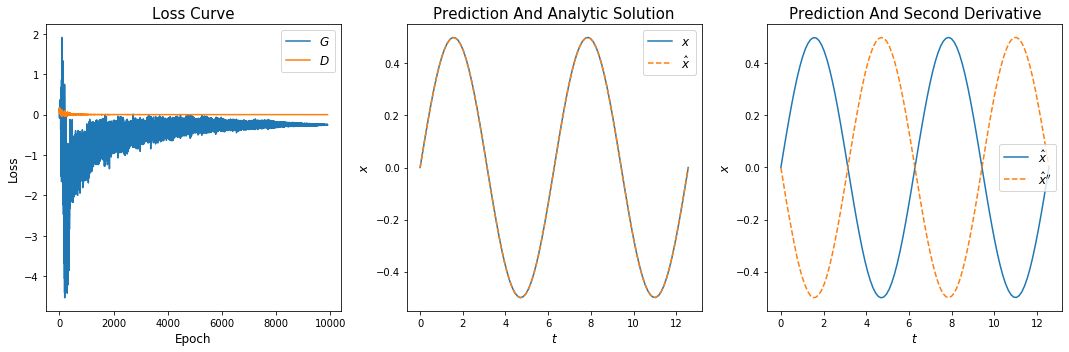

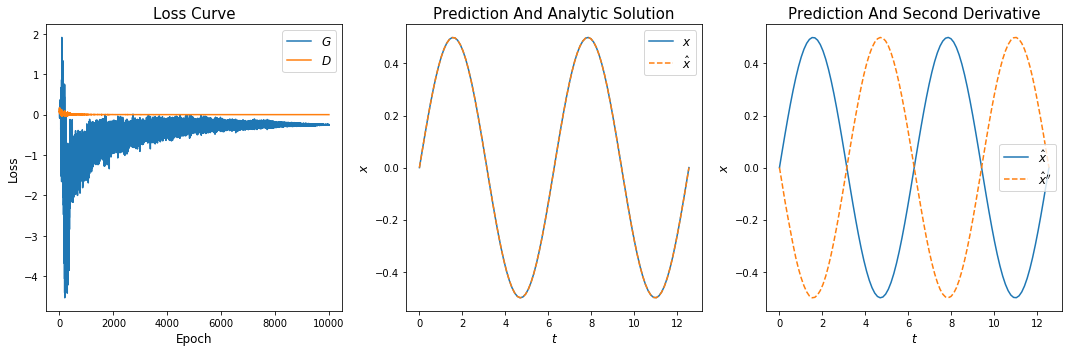

Final MSE: 6.11250916549011e-09


In [3]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=6,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=True)

res = train_GAN_SHO_unsupervised(G, D, d_lr=1e-3, g_lr=2e-4, final_plot=False, num_epochs=10000, 
                                 realtime_plot=True, G_iters=4, D_iters=1, gp=0.1, check_every=100, system_of_ODE=False)

### Comparable MSE-based

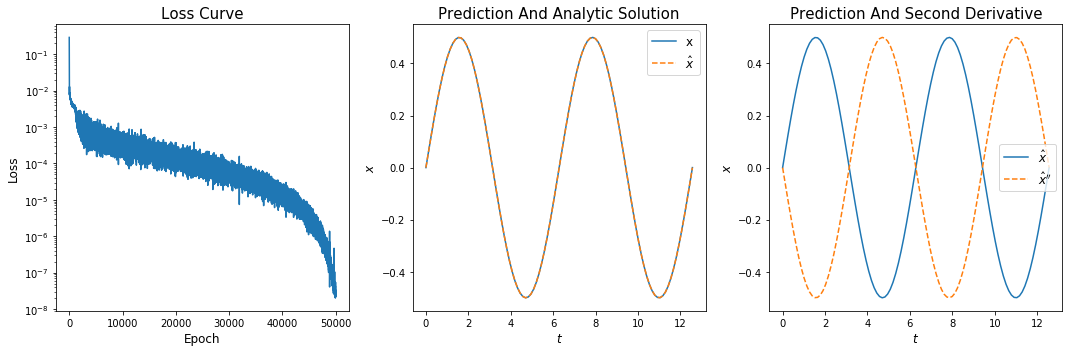

Final MSE 4.051860583165201e-11


In [3]:
msenet = Generator(in_dim=1, out_dim=1,
    n_hidden_units=64,
    n_hidden_layers=6,
    activation=nn.Tanh(),
    output_tan=False,
    residual=True)
res = train_MSE(msenet, method='unsupervised', niters=50000, make_plot=True, perturb=True, lr=2e-4)

### G:D = 9:1

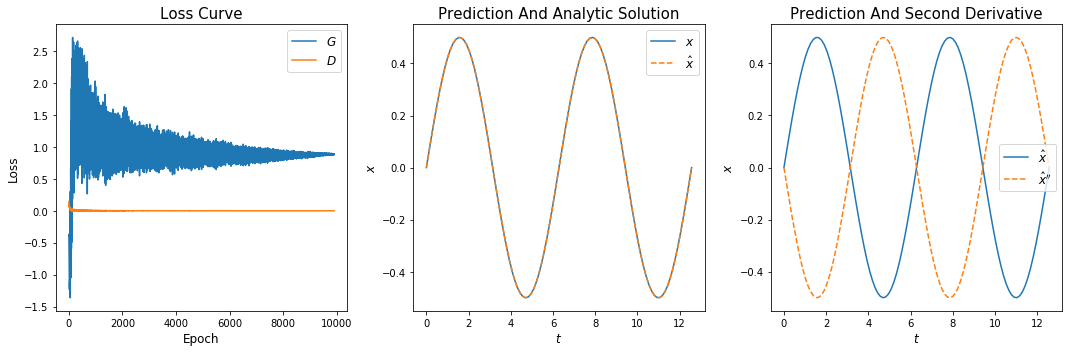

Final MSE: 1.215472056337319e-09


In [2]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=6,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=True)

res = train_GAN_SHO_unsupervised(G, D, d_lr=1e-3, g_lr=2e-4, final_plot=False, num_epochs=10000, 
                                 realtime_plot=True, G_iters=9, D_iters=1, gp=0.1, check_every=100, system_of_ODE=False)

# Not WGAN

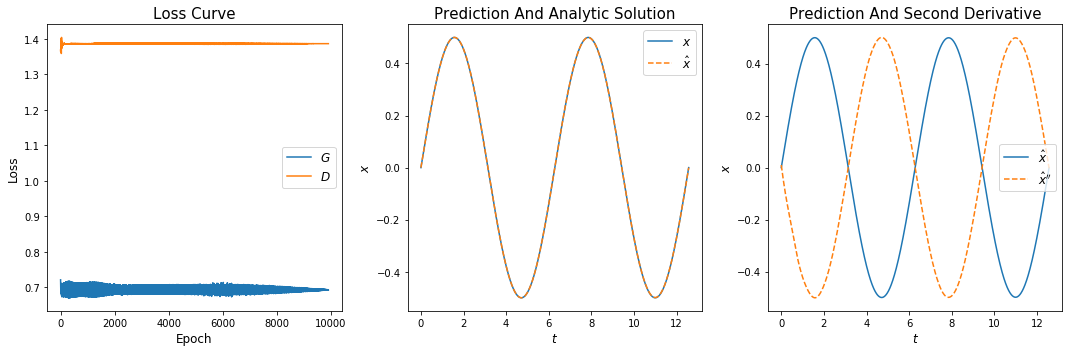

Final MSE: 2.350483470081599e-07


In [13]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=6,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=False, # false if not WGAN
                  residual=True)

res = train_GAN_SHO_unsupervised(G, D, d_lr=2e-4, g_lr=2e-4, final_plot=False, n=1000, num_epochs=10000, wgan=False,
                                 realtime_plot=True, G_iters=1, D_iters=1, gp=0.1, check_every=100, system_of_ODE=False)

#### Only changed the seed: collapsed

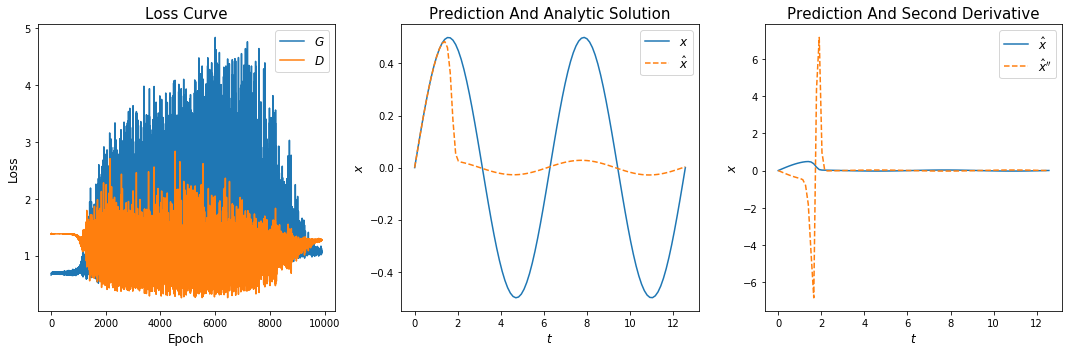

Final MSE: 0.09299401193857193


In [16]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=6,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=False, # false if not WGAN
                  residual=True)

res = train_GAN_SHO_unsupervised(G, D, d_lr=2e-4, g_lr=2e-4, seed=101, n=100, num_epochs=10000, wgan=False,
                                 realtime_plot=True, G_iters=1, D_iters=1, check_every=100, system_of_ODE=False)

### WGAN but different result from Hyperjob

LRs are constant but model sizes different

In [17]:
opt_params2 = {'num_epochs': 10000, 'd_lr': 0.001, 'g_lr': 0.001, 'g_units': 32, 'g_layers': 4, 
 'd_units': 64, 'd_layers': 6, 'gp': 0.1, 'g_iters': 1, 'd_iters': 1}

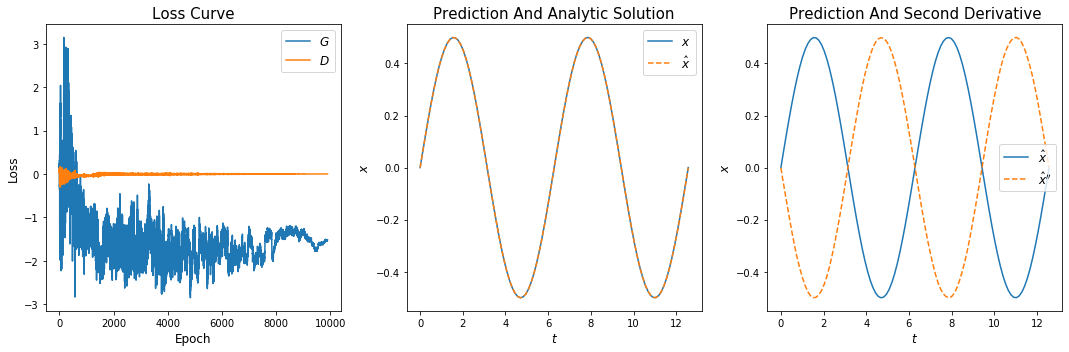

Final MSE: 3.4797622561200114e-09


In [25]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=32,
              n_hidden_layers=4,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=6,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=True)

res = train_GAN_SHO_unsupervised(G, D, d_lr=1e-3, g_lr=1e-3, seed=0, n=100, num_epochs=10000, wgan=True, gp=0.1,
                                 G_iters=1, D_iters=1, realtime_plot=True, check_every=100, system_of_ODE=False)

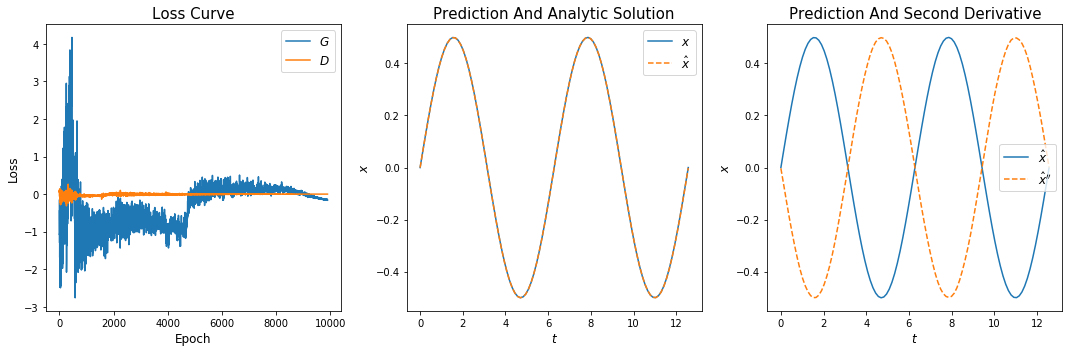

Final MSE: 1.4561623018494174e-09


In [26]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=32,
              n_hidden_layers=4,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=6,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=True)

res = train_GAN_SHO_unsupervised(G, D, d_lr=1e-3, g_lr=1e-3, seed=1, n=100, num_epochs=10000, wgan=True, gp=0.1,
                                 G_iters=1, D_iters=1, realtime_plot=True, check_every=100, system_of_ODE=False)